In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
num_words = 10000
EPOCHS = 10
BATCH_SIZE = 512

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

In [4]:
train_data[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
train_labels[:2]

array([1, 0])

In [6]:
# Decoding one of the answers
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[:3]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Let's generate a network with 3 layers:

Dense layer with 16 neurons, ReLU activation, input size addition \\
Dense layer with 16 neurons, ReLU activation \\
Dense layer with 1 intermediate neuron, sigmoid activation function \\

In [12]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(num_words,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
original_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


Let's compile the model using:

RMSprop optimizer \\
loss function "binary_crossentropy" \\
accuracy metric \\

In [14]:
original_model.compile(optimizer='RMSprop',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

In [15]:
# Train model

In [15]:
original_model_hist = original_model.fit(x_train, 
                                         y_train, 
                                         epochs=EPOCHS, 
                                         batch_size=BATCH_SIZE, 
                                         validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 6s 99ms/step - loss: 0.4892 - accuracy: 0.8028 - val_loss: 0.3576 - val_accuracy: 0.8782
Epoch 2/10
49/49 [==============================] - 2s 39ms/step - loss: 0.2867 - accuracy: 0.8996 - val_loss: 0.2888 - val_accuracy: 0.8889
Epoch 3/10
49/49 [==============================] - 2s 41ms/step - loss: 0.2230 - accuracy: 0.9205 - val_loss: 0.2768 - val_accuracy: 0.8893
Epoch 4/10
49/49 [==============================] - 2s 40ms/step - loss: 0.1888 - accuracy: 0.9326 - val_loss: 0.2834 - val_accuracy: 0.8876
Epoch 5/10
49/49 [==============================] - 2s 40ms/step - loss: 0.1667 - accuracy: 0.9402 - val_loss: 0.2916 - val_accuracy: 0.8846
Epoch 6/10
49/49 [==============================] - 3s 55ms/step - loss: 0.1485 - accuracy: 0.9482 - val_loss: 0.3151 - val_accuracy: 0.8784
Epoch 7/10
49/49 [==============================] - 2s 51ms/step - loss: 0.1326 - accuracy: 0.9546 - val_loss: 0.3217 - val_accuracy: 0.8786
Epoch 8/10
49

In [16]:
original_model_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

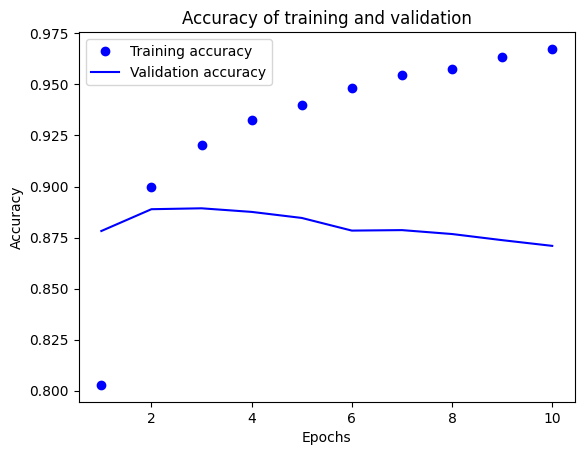

In [17]:
original_acc = original_model_hist.history['accuracy']
original_val_acc = original_model_hist.history['val_accuracy']
original_loss = original_model_hist.history['loss']
original_val_loss = original_model_hist.history['val_loss']

epochs = range(1, EPOCHS+1)

plt.plot(epochs, original_acc, 'bo', label='Training accuracy')
plt.plot(epochs, original_val_acc, 'b', label='Validation accuracy')
plt.title('Accuracy of training and validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

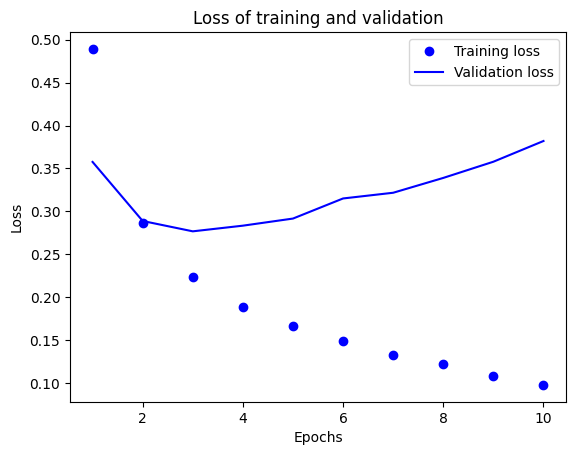

In [18]:
plt.plot(epochs, original_loss, 'bo', label='Training loss')
plt.plot(epochs, original_val_loss, 'b', label='Validation loss')
plt.title('Loss of training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
# Model is overfitted as some samples returns 0.99 or 0.01 and for others 0.6 or 0.4 certainty level
original_model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.14023079],
       [0.99997216],
       [0.7954938 ],
       ...,
       [0.12122617],
       [0.03119118],
       [0.9212192 ]], dtype=float32)

### Reduce network size


In [20]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(num_words,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 40004     
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile

In [22]:
smaller_model.compile(optimizer='RMSprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [25]:
# Train

In [23]:
smaller_model_hist = smaller_model.fit(x_train, 
                                       y_train, 
                                       epochs=EPOCHS, 
                                       batch_size=BATCH_SIZE, 
                                       validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 4s 68ms/step - loss: 0.5944 - accuracy: 0.7048 - val_loss: 0.5398 - val_accuracy: 0.7828
Epoch 2/10
49/49 [==============================] - 2s 38ms/step - loss: 0.4934 - accuracy: 0.8386 - val_loss: 0.4928 - val_accuracy: 0.8402
Epoch 3/10
49/49 [==============================] - 2s 38ms/step - loss: 0.4470 - accuracy: 0.8853 - val_loss: 0.4708 - val_accuracy: 0.8558
Epoch 4/10
49/49 [==============================] - 3s 54ms/step - loss: 0.4136 - accuracy: 0.9093 - val_loss: 0.4553 - val_accuracy: 0.8738
Epoch 5/10
49/49 [==============================] - 2s 42ms/step - loss: 0.3877 - accuracy: 0.9264 - val_loss: 0.4466 - val_accuracy: 0.8806
Epoch 6/10
49/49 [==============================] - 2s 38ms/step - loss: 0.3650 - accuracy: 0.9374 - val_loss: 0.4425 - val_accuracy: 0.8781
Epoch 7/10
49/49 [==============================] - 2s 38ms/step - loss: 0.3450 - accuracy: 0.9466 - val_loss: 0.4407 - val_accuracy: 0.8776
Epoch 8/10
49

In [39]:
# Compare of models

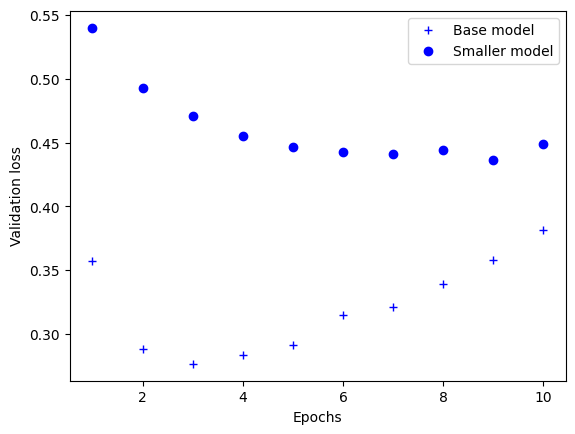

In [24]:
smaller_model_val_loss = smaller_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Base model') 
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

### Regularization L1 and L2

In [25]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
# Compile

In [26]:
l2_model.compile(optimizer='RMSprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [37]:
# Train

In [27]:
l2_model_hist = l2_model.fit(x_train,
                             y_train,
                             epochs=EPOCHS,
                             batch_size=BATCH_SIZE,
                             validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 5s 99ms/step - loss: 0.5567 - accuracy: 0.8112 - val_loss: 0.4351 - val_accuracy: 0.8802
Epoch 2/10
49/49 [==============================] - 2s 48ms/step - loss: 0.3704 - accuracy: 0.9025 - val_loss: 0.3781 - val_accuracy: 0.8889
Epoch 3/10
49/49 [==============================] - 2s 39ms/step - loss: 0.3141 - accuracy: 0.9189 - val_loss: 0.3804 - val_accuracy: 0.8838
Epoch 4/10
49/49 [==============================] - 2s 41ms/step - loss: 0.2908 - accuracy: 0.9261 - val_loss: 0.3882 - val_accuracy: 0.8794
Epoch 5/10
49/49 [==============================] - 2s 42ms/step - loss: 0.2707 - accuracy: 0.9358 - val_loss: 0.3790 - val_accuracy: 0.8835
Epoch 6/10
49/49 [==============================] - 2s 41ms/step - loss: 0.2604 - accuracy: 0.9383 - val_loss: 0.3854 - val_accuracy: 0.8818
Epoch 7/10
49/49 [==============================] - 3s 63ms/step - loss: 0.2528 - accuracy: 0.9417 - val_loss: 0.3887 - val_accuracy: 0.8814
Epoch 8/10
49

In [36]:
# Compare of models

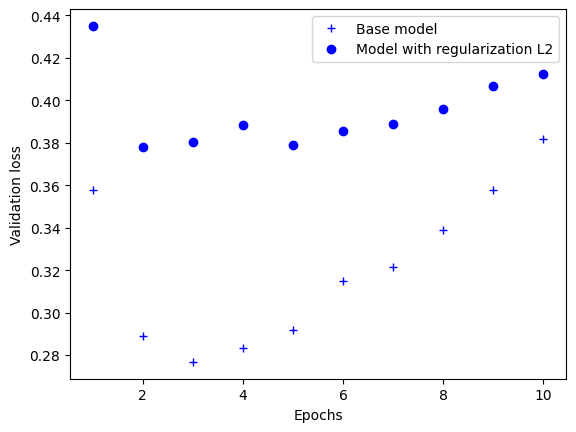

In [28]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Base model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Model with regularization L2')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### Dropout

In [29]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
# Compile

In [30]:
dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [34]:
# Train

In [31]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=EPOCHS,
                               batch_size=BATCH_SIZE,
                               validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 4s 67ms/step - loss: 0.6101 - acc: 0.6571 - val_loss: 0.4627 - val_acc: 0.8547
Epoch 2/10
49/49 [==============================] - 3s 59ms/step - loss: 0.4562 - acc: 0.8045 - val_loss: 0.3441 - val_acc: 0.8816
Epoch 3/10
49/49 [==============================] - 2s 45ms/step - loss: 0.3619 - acc: 0.8589 - val_loss: 0.2965 - val_acc: 0.8855
Epoch 4/10
49/49 [==============================] - 2s 39ms/step - loss: 0.3032 - acc: 0.8879 - val_loss: 0.2766 - val_acc: 0.8895
Epoch 5/10
49/49 [==============================] - 2s 41ms/step - loss: 0.2656 - acc: 0.9027 - val_loss: 0.2764 - val_acc: 0.8884
Epoch 6/10
49/49 [==============================] - 2s 38ms/step - loss: 0.2370 - acc: 0.9122 - val_loss: 0.2857 - val_acc: 0.8877
Epoch 7/10
49/49 [==============================] - 2s 39ms/step - loss: 0.2149 - acc: 0.9225 - val_loss: 0.2989 - val_acc: 0.8866
Epoch 8/10
49/49 [==============================] - 3s 58ms/step - loss: 0.1976 - a

In [32]:
# Compare of models

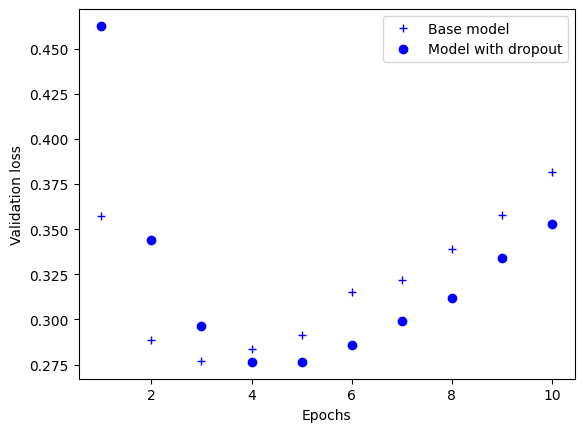

In [33]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Base model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Model with dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()